# Testing Geometry Properties Calculator

This notebook tests the `calculate_geometry_properties` function with various polygon shapes and visualizes the results.

In [34]:
import shapely.wkb as wkb
from shapely.geometry import Polygon, Point, MultiPoint
import matplotlib.pyplot as plt
import numpy as np


def calculate_geometry_properties(wkb_geometry):
    """
    Calculate centroid and minimum enclosing circle radius from WKB geometry.

    Args:
        wkb_geometry (str): The WKB geometry as a hex string.

    Returns:
        dict: Dictionary containing polygon, centroid point, and MEC radius
    """
    # Convert WKB to Shapely polygon
    polygon = wkb.loads(bytes.fromhex(wkb_geometry))

    # Get centroid
    centroid = polygon.centroid

    # Calculate minimum enclosing circle radius by checking all boundary points
    distances = [centroid.distance(Point(p)) for p in polygon.exterior.coords]
    radius = max(distances)

    # Convert radius to meters (assuming coordinates are in WGS84)
    radius_meters = int(radius * 111000)  # Rough conversion from degrees to meters

    return {
        "polygon": wkb_geometry,
        "centroid": centroid.wkb_hex,
        "mec_radius": radius_meters,
    }

In [35]:
def plot_geometry_results(polygon, centroid, radius, title):
    """Helper function to plot polygon, centroid, and minimum enclosing circle"""
    fig, ax = plt.subplots(figsize=(10, 10))

    # Plot polygon
    x, y = polygon.exterior.xy
    ax.plot(x, y, "b-", label="Polygon")
    ax.fill(x, y, alpha=0.3)

    # Plot centroid
    ax.plot(centroid.x, centroid.y, "ro", label="Centroid")

    # Plot minimum enclosing circle
    circle = plt.Circle(
        (centroid.x, centroid.y),
        radius,
        fill=False,
        color="g",
        linestyle="--",
        label="MEC",
    )
    ax.add_artist(circle)

    # Adjust axes limits to fit the entire circle
    ax.set_xlim(centroid.x - radius - 1, centroid.x + radius + 1)  # Add margin
    ax.set_ylim(centroid.y - radius - 1, centroid.y + radius + 1)  # Add margin

    ax.set_aspect("equal", adjustable="datalim")
    ax.grid(True)
    ax.legend()
    ax.set_title(title)
    plt.show()

## Test Case 1: Simple Rectangle

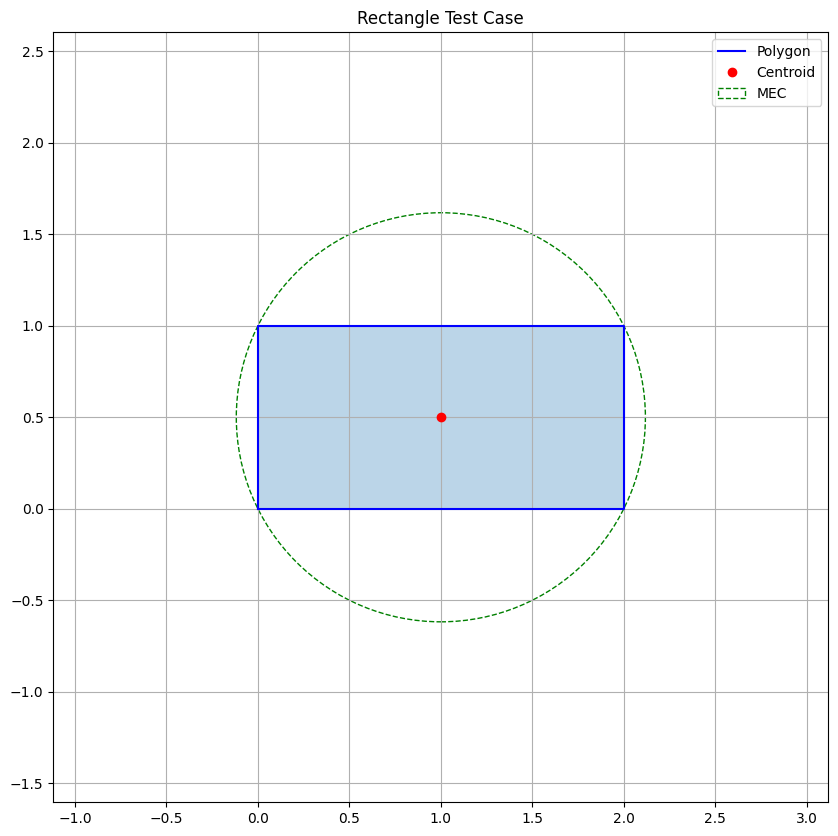

Centroid: 0101000000000000000000F03F000000000000E03F
MEC Radius: 124101 meters


In [36]:
# Create a rectangle
rectangle = Polygon([(0, 0), (0, 1), (2, 1), (2, 0)])
wkb_rectangle = rectangle.wkb.hex()

# Calculate properties
result = calculate_geometry_properties(wkb_rectangle)

# Convert results back for plotting
polygon = wkb.loads(bytes.fromhex(result['polygon']))
centroid = wkb.loads(bytes.fromhex(result['centroid']))
radius = result['mec_radius'] / 111000  # Convert back to degrees for plotting

# Plot results
plot_geometry_results(polygon, centroid, radius, 'Rectangle Test Case')
print(f"Centroid: {result['centroid']}")
print(f"MEC Radius: {result['mec_radius']} meters")

## Test Case 2: Triangle

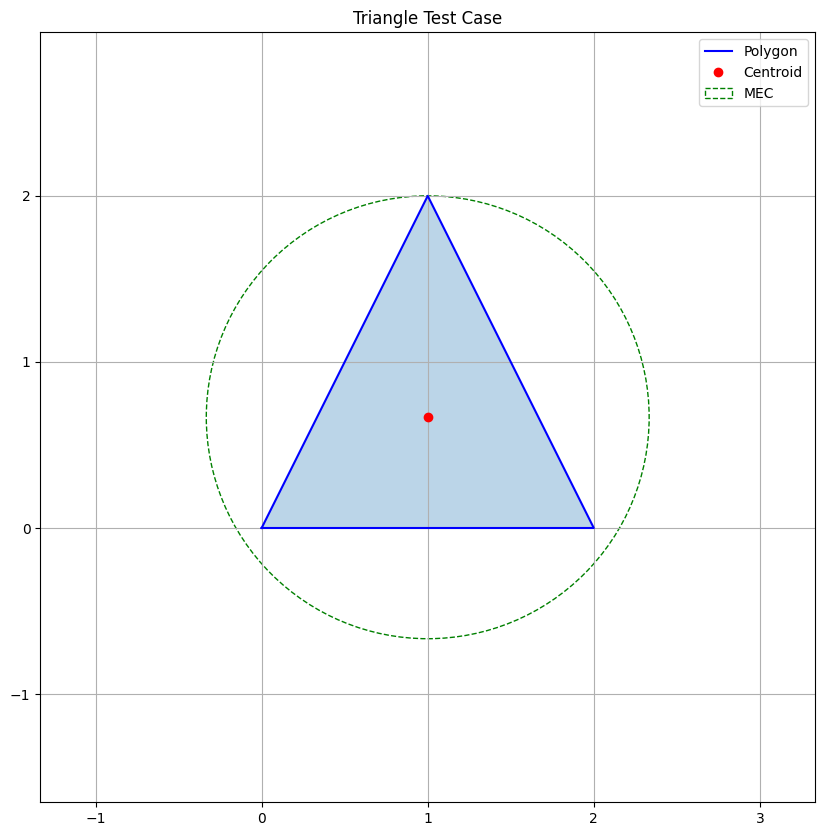

Centroid: 0101000000000000000000F03F555555555555E53F
MEC Radius: 148000 meters


In [37]:
# Create a triangle
triangle = Polygon([(0, 0), (1, 2), (2, 0)])
wkb_triangle = triangle.wkb.hex()

# Calculate properties
result = calculate_geometry_properties(wkb_triangle)

# Convert results back for plotting
polygon = wkb.loads(bytes.fromhex(result['polygon']))
centroid = wkb.loads(bytes.fromhex(result['centroid']))
radius = result['mec_radius'] / 111000

# Plot results
plot_geometry_results(polygon, centroid, radius, 'Triangle Test Case')
print(f"Centroid: {result['centroid']}")
print(f"MEC Radius: {result['mec_radius']} meters")

## Test Case 3: Irregular Polygon

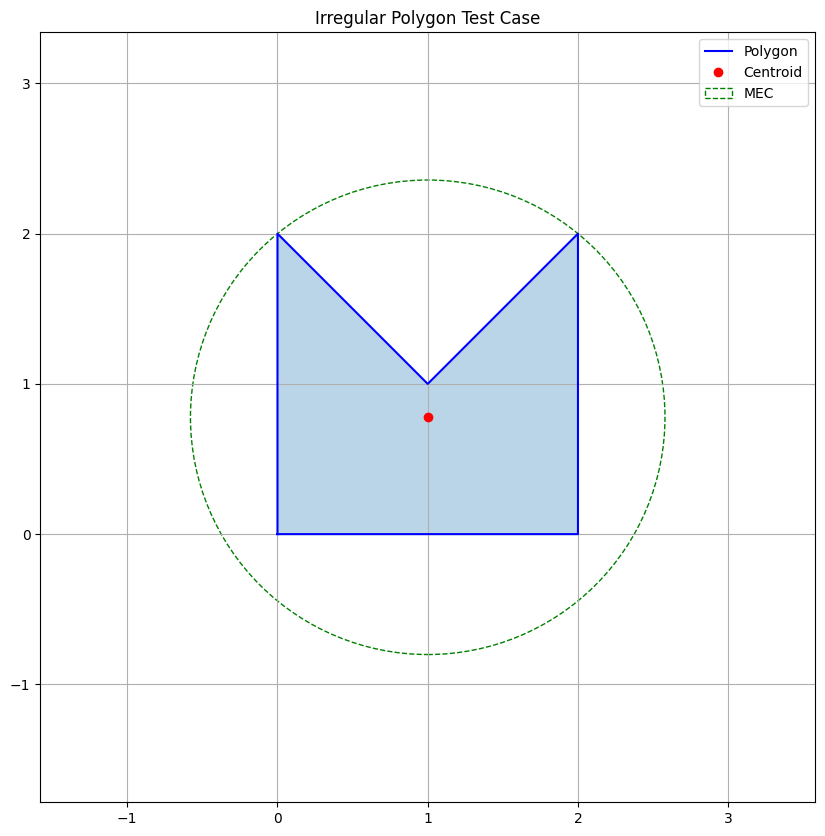

Centroid: 0101000000000000000000F03F398EE3388EE3E83F
MEC Radius: 175289 meters


In [27]:
# Create an irregular polygon
irregular = Polygon([(0, 0), (0, 2), (1, 1), (2, 2), (2, 0)])
wkb_irregular = irregular.wkb.hex()

# Calculate properties
result = calculate_geometry_properties(wkb_irregular)

# Convert results back for plotting
polygon = wkb.loads(bytes.fromhex(result['polygon']))
centroid = wkb.loads(bytes.fromhex(result['centroid']))
radius = result['mec_radius'] / 111000

# Plot results
plot_geometry_results(polygon, centroid, radius, 'Irregular Polygon Test Case')
print(f"Centroid: {result['centroid']}")
print(f"MEC Radius: {result['mec_radius']} meters")

## Test Case 4: Complex Polygon (Star-like shape)

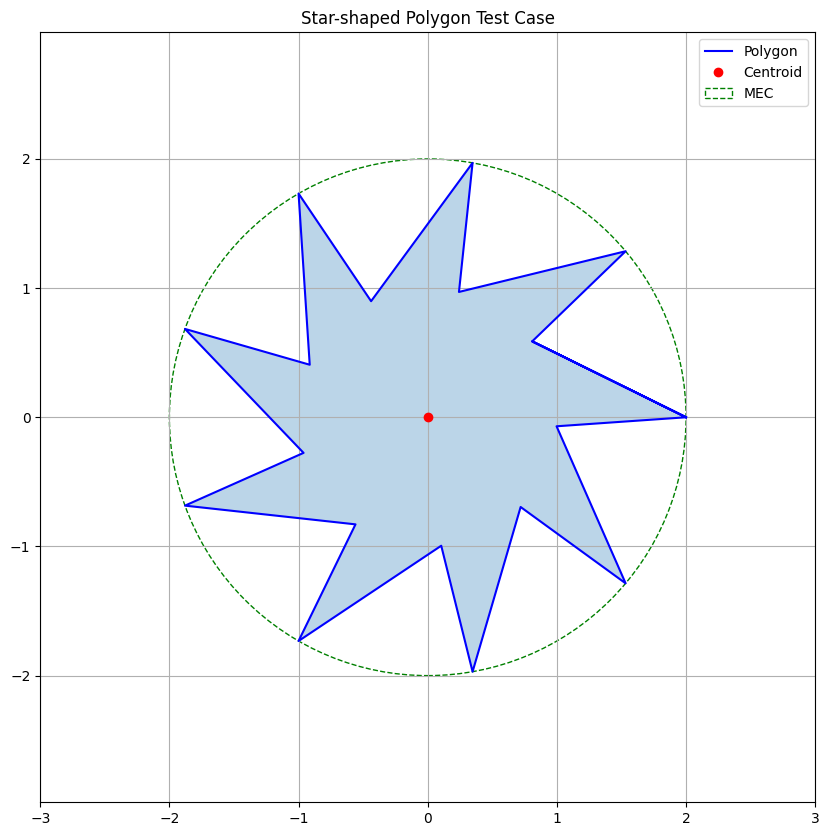

Centroid: 0101000000C61AAA0D37FC993CD9EA546D2B8EA3BC
MEC Radius: 222000 meters


In [39]:
# Create a star-like shape
t = np.linspace(0, 2*np.pi, 10)
r_outer = 2
r_inner = 1
x = np.zeros(20)
y = np.zeros(20)
x[::2] = r_outer * np.cos(t)
x[1::2] = r_inner * np.cos(t + np.pi/5)
y[::2] = r_outer * np.sin(t)
y[1::2] = r_inner * np.sin(t + np.pi/5)

star = Polygon(zip(x, y))
wkb_star = star.wkb.hex()

# Calculate properties
result = calculate_geometry_properties(wkb_star)

# Convert results back for plotting
polygon = wkb.loads(bytes.fromhex(result['polygon']))
centroid = wkb.loads(bytes.fromhex(result['centroid']))
radius = result['mec_radius'] / 111000

# Plot results
plot_geometry_results(polygon, centroid, radius, 'Star-shaped Polygon Test Case')
print(f"Centroid: {result['centroid']}")
print(f"MEC Radius: {result['mec_radius']} meters")